In [86]:
import os
JSON_DIR = "D:\JSON_stored\mbnetv2"
CSV_DIR_SLOWFAST = "D:\JSON_stored\slowfast"
MBNET_COLOR = (0,0,1)
SLOWFAST_COLOR = (1,0,0)
os.listdir(JSON_DIR)

['run-mobilenet_v2-tag-train_batch_loss.csv',
 'run-mobilenet_v2-tag-train_batch_loss.json',
 'run-mobilenet_v2-tag-train_batch_prec1.json',
 'run-mobilenet_v2-tag-train_epoch_loss.csv',
 'run-mobilenet_v2-tag-train_epoch_prec1.csv',
 'run-mobilenet_v2-tag-train_loss.csv',
 'run-mobilenet_v2-tag-train_loss.json',
 'run-mobilenet_v2-tag-train_prec1.json',
 'run-mobilenet_v2-tag-val_batch_loss.csv',
 'run-mobilenet_v2-tag-val_batch_loss.json',
 'run-mobilenet_v2-tag-val_batch_prec1.csv',
 'run-mobilenet_v2-tag-val_batch_prec1.json',
 'run-mobilenet_v2-tag-val_epoch_loss.csv',
 'run-mobilenet_v2-tag-val_epoch_loss.json',
 'run-mobilenet_v2-tag-val_epoch_prec1.csv',
 'run-mobilenet_v2-tag-val_epoch_prec1.json']

Plot train

In [3]:
import json
import matplotlib.pyplot as plt

train_loss_1_path = os.path.join(JSON_DIR, 'run-mobilenet_v2-tag-train_loss.json')
with open(train_loss_1_path) as td1:
    train_loss_1 = json.load(td1)

train_loss_2_path = os.path.join(JSON_DIR, 'run-mobilenet_v2-tag-train_batch_loss.json')
with open(train_loss_2_path) as td2:
    train_loss_2 = json.load(td2)

train_loss = train_loss_1 + train_loss_2

In [95]:
import pandas as pd

def extract_steps_values(data):
    steps = data["Step"].values
    values = data["Value"].values

    return steps, values

def load_pd_dataframe(filename, model_name="mbnet"):
    if model_name is "mbnet":
        file_path = os.path.join(JSON_DIR, filename)
    else:
        file_path = os.path.join(CSV_DIR_SLOWFAST, filename)

    with open(file_path) as fd:
        frame = pd.read_csv(fd)
    return frame

def merge_frames(frame1, frame2):
    max_step = frame1["Step"].max()
    frame2_ext = frame2[frame2["Step"] > max_step]

    frame = frame1.append(frame2_ext)
    frame = frame.drop_duplicates(subset=["Step"])
    return frame

def plot_batch_loss(steps, loss_values, color=(0,0,1), save_name=None, legend=None):
    plt.title("Gubitak kroz mini grupe")
    plt.xlabel("Iteracija")
    plt.ylabel("Gubitak")
    plt.grid()

    plt.plot(steps, loss_values, color=color)
    if legend:
        plt.legend([legend])
    if save_name:
        plt.savefig(save_name)

def plot_epoch_loss(steps, loss_values, color=(0,0,1), save_name=None, legend=None):
    plt.title("Gubitak kroz epohe")
    plt.xlabel("Epoha")
    plt.ylabel("Gubitak")
    plt.grid()

    plt.plot(steps, loss_values, color=color)
    if legend:
        plt.legend([legend])
    if save_name:
        plt.savefig(save_name)

In [29]:
# due to a bug initial record of mbnetv2 training was stored in a separate file
train_loss_1_path = os.path.join(JSON_DIR, 'run-mobilenet_v2-tag-train_loss.csv')
with open(train_loss_1_path) as td1:
    train_loss_1 = pd.read_csv(train_loss_1_path)

train_loss_2_path = os.path.join(JSON_DIR, 'run-mobilenet_v2-tag-train_batch_loss.csv')
with open(train_loss_2_path) as td2:
    train_loss_2 = pd.read_csv(train_loss_2_path)

In [10]:
train_loss_2_ext = train_loss_2[train_loss_2["Step"] > 17854]
train_loss_2_ext


,Wall time,Step,Value
49,1.599781e+09,17904,0.872895
50,1.599781e+09,18004,0.835123
51,1.599781e+09,18104,0.908701
52,1.599781e+09,18154,0.978606
53,1.599781e+09,18254,0.927286
...,...,...,...
995,1.600067e+09,79079,0.517786
996,1.600067e+09,79129,0.938348
997,1.600067e+09,79179,0.355640
998,1.600067e+09,79229,0.372450


In [98]:
train_loss = merge_frames(train_loss_1, train_loss_2)
steps = train_loss["Step"].values
loss_values = train_loss["Value"].values

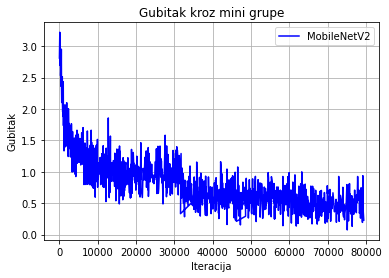

In [100]:
# plt.title("Gubitak kroz mini grupe")
# plt.xlabel("Iteracija")
# plt.ylabel("Gubitak")
# plt.grid()
# plt.plot(steps, loss_values, color=(0,0,1))
# plt.savefig()
plot_batch_loss(steps, loss_values, MBNET_COLOR, "BatchLossMBNetV2.png", "MobileNetV2")


Plot validation acc for mbnetv2 and slowfast

In [70]:
val_acc1 = load_pd_dataframe('run-mobilenet_v2-tag-val_batch_prec1.csv')
val_acc2 = load_pd_dataframe('run-mobilenet_v2-tag-val_epoch_prec1.csv')
val_acc_mbnet = merge_frames(val_acc1, val_acc2)
val_acc_slowfast = load_pd_dataframe('run-slow_fast_mobilenet_v2-tag-val_epoch_prec1.csv', "slowfast")
steps_mbnet, val_acc_mbnet_values = extract_steps_values(val_acc_mbnet)
steps_slowfast, val_acc_slowfast_values = extract_steps_values(val_acc_slowfast)

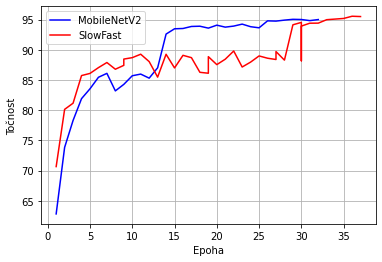

In [92]:
plt.ylabel("Točnost")
plt.xlabel("Epoha")

plt.plot(steps_mbnet, val_acc_mbnet_values, 'b', label="MobileNetV2")
plt.plot(steps_slowfast, val_acc_slowfast_values, 'r', label="SlowFast")
plt.legend()
plt.grid()

plt.savefig("PreciznostiMBNetEpohe.png")

Plot SlowFast train loss

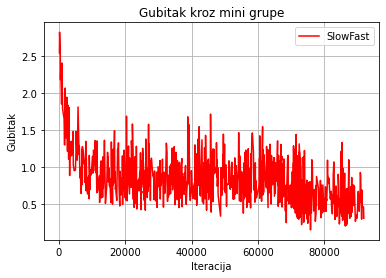

In [96]:
train_loss = load_pd_dataframe('run-slow_fast_mobilenet_v2-tag-train_batch_loss.csv', "slowfast")
steps, losess = extract_steps_values(train_loss)
plot_batch_loss(steps, losess, SLOWFAST_COLOR, "BatchLossSlowFast.png", "SlowFast")